In [146]:
# %pip install pandas

In [147]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

df = pd.read_csv('3a_klienci.csv')

df.head()  # returns n=10 (default) first rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Ćw 1

> Jak wyglądać będzie zależność miedzy dochodem a spending score?

> hint: Aby dostać dochód użyj instrukcji

df['Annual Income (k$)']


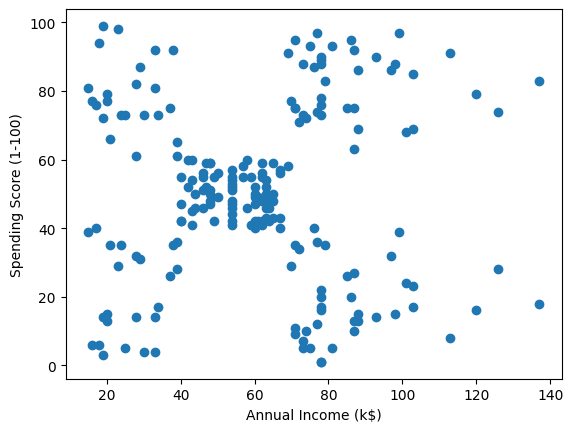

In [148]:


plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [149]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [150]:
x = np.vstack((df['Annual Income (k$)'].values,
              df['Spending Score (1-100)'].values)).T
x = torch.from_numpy(x)

In [152]:
clusters = 5
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=clusters, distance='euclidean', device=device
)

running k-means on cpu..


[running kmeans]: 8it [00:00, 210.60it/s, center_shift=0.000000, iteration=8, tol=0.000100]


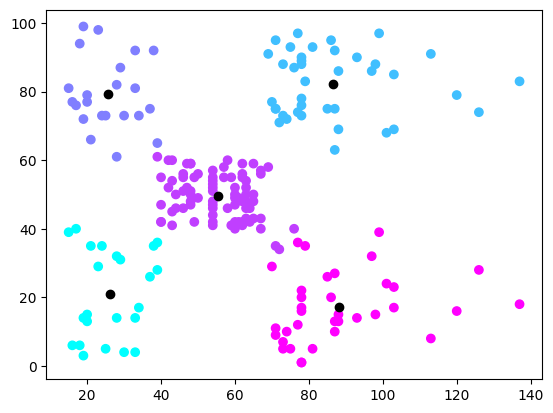

In [153]:

plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:,
            1], c='black', edgecolors='black')
plt.show()

## Ćw 2

> Do której klasy zostanie zaklyfikowany klient o dochodze 55k$ i jego spending score jest na poziomie 38?


In [154]:
# musimy dać dwa ponieważ funkcja kmeans_predict musi dostać tensor o pierwszym wymiarze >1
y = torch.tensor([[55, 38], [55, 38]])
cluster_ids_y = kmeans_predict(
    y, cluster_centers, distance='euclidean', device=device)

predicting on cpu..


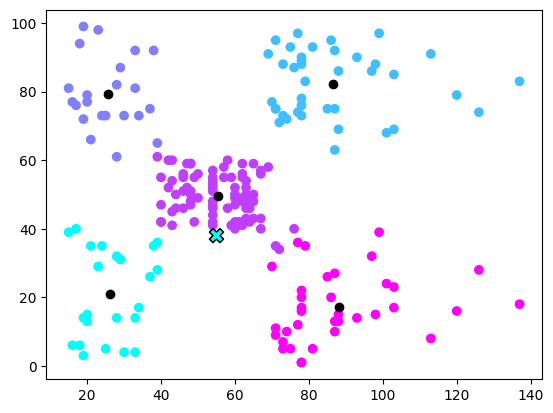

In [155]:
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:,
            1], c='black', edgecolors='black')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool',
            marker='X', s=100, edgecolors='black')
plt.show()

Do którego klastra został zaklasyfikowany nasz klient?


In [156]:
print(cluster_ids_y[0])
print(cluster_centers[4])
# wizualnie na wykresie można sprawdzić że punkt został zakwalifykowany do dobrej grupy

tensor(3)
tensor([88.2000, 17.1143])
